# Exercice Titanic

## Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
from titanic import preprocessing as pproc

In [3]:
from titanic import modelling as model

## Data extraction

In [4]:
data = pd.read_csv('data/titanic_train.csv')
data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Preprocessing

In [6]:
X, Y = pproc.preprocessing(data)
X.head(5)

SibSp  Parch     Fare  IsChild  IsOld  IsMale  Title_Master  Title_Mr  \
0      1      0   7.2500        0      0       1             0         1   
1      1      0  71.2833        0      0       0             0         0   
2      0      0   7.9250        0      0       0             0         0   
3      1      0  53.1000        0      0       0             0         0   
4      0      0   8.0500        0      0       1             0         1   

   Title_Mrs  Pclass_1  Pclass_3  
0          0         0         1  
1          1         1         0  
2          0         0         1  
3          1         1         0  
4          0         0         1

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
IsChild         891 non-null int64
IsOld           891 non-null int64
IsMale          891 non-null int64
Title_Master    891 non-null uint8
Title_Mr        891 non-null uint8
Title_Mrs       891 non-null uint8
Pclass_1        891 non-null uint8
Pclass_3        891 non-null uint8
dtypes: float64(1), int64(5), uint8(5)
memory usage: 46.2 KB


## Modelling (first on train data)

In [8]:
X_train, X_test, Y_train, Y_test = model.staticTrainTestSplit(X, Y)

In [9]:
Y_predicted_randFor = model.predictRandomForestClassifier(X_train, X_test, Y_train)

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy_score(Y_test, Y_predicted_randFor)

0.8507462686567164

## Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title('Confusion matrix')
    plt.set_cmap('Blues')
    plt.colorbar()

    target_names = ['not survived', 'survived']

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.tight_layout()

[[150  18]
 [ 22  78]]


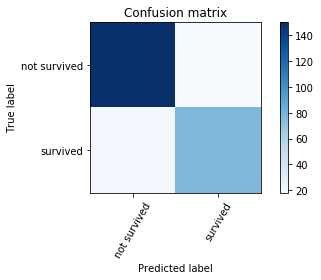

In [13]:
cm = confusion_matrix(Y_test, Y_predicted_randFor)
print(cm)
plot_confusion(cm)

## Use of the model on titanic_test

In [14]:
final_target = pd.read_csv('data/titanic_test.csv')

In [15]:
X_test, _ = pproc.preprocessing(final_target)

In [16]:
Y_predicted = model.predictRandomForestClassifier(X, X_test, Y)

In [17]:
Y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,